# **1. Perkenalan Dataset**


**Sumber Dataset**:
Dataset yang digunakan adalah "Daily Food & Nutrition Dataset" dari Kaggle

link: https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset?select=daily_food_nutrition_dataset.csv

**Ketentuan Dataset:**
1. **Tanpa label**
2. **Jumlah baris**: Dataset memiliki 10.000 data
3. **Tipe data**:
  - Kategorikal (Food_Item, Category, dan Meal_Type)
  - Numerikal ( Date, User_ID, Calories (kcal), Protein (g), Carbohydrates (g), Fat (g), Fiber (g), Sugars (g), Sodium (mg), Cholesterol (mg), Meal_Type, dan Water_Intake (ml) )

# **2. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mode

# **3. Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/pemula_dt/nutrisi.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
print(df.isnull().sum())

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [ ]:
print(df.describe(include='all'))

              Date       User_ID Food_Item Category  Calories (kcal)  \
count        10000  10000.000000     10000    10000     10000.000000   
unique         366           NaN        35        7              NaN   
top     2024-05-20           NaN      Milk    Dairy              NaN   
freq            45           NaN       311     1460              NaN   
mean           NaN    498.706300       NaN      NaN       327.693900   
std            NaN    289.123477       NaN      NaN       158.194716   
min            NaN      1.000000       NaN      NaN        50.000000   
25%            NaN    245.000000       NaN      NaN       190.000000   
50%            NaN    492.000000       NaN      NaN       328.000000   
75%            NaN    748.000000       NaN      NaN       464.000000   
max            NaN   1000.000000       NaN      NaN       600.000000   

         Protein (g)  Carbohydrates (g)      Fat (g)     Fiber (g)  \
count   10000.000000       10000.000000  10000.00000  10000.00000

Text(0, 0.5, 'Item Makanan')

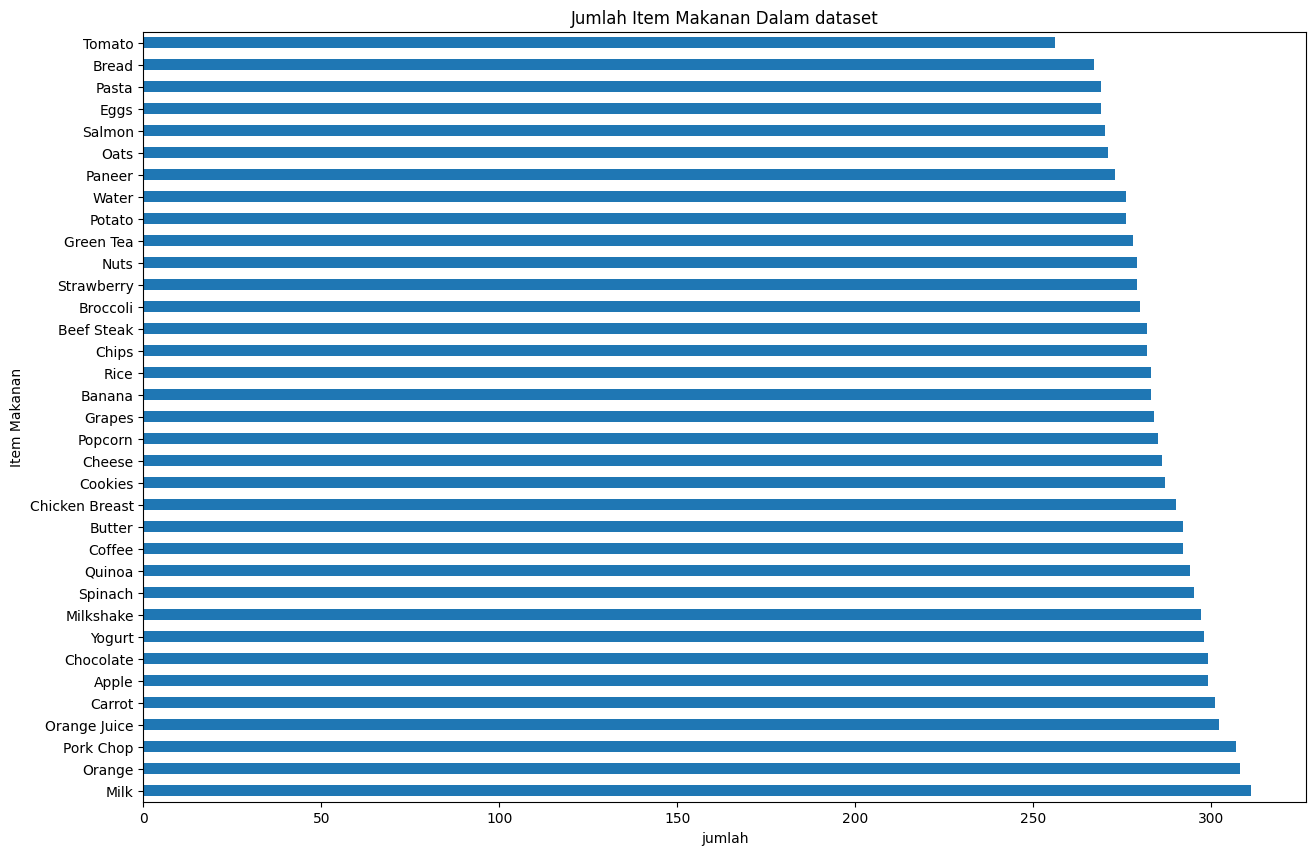

In [ ]:
food_item_counts = df['Food_Item'].value_counts()

food_item_barchart = food_item_counts.plot.barh(figsize=(15, 10))
food_item_barchart.set_title('Jumlah Item Makanan Dalam dataset')
food_item_barchart.set_xlabel('jumlah')
food_item_barchart.set_ylabel('Item Makanan')

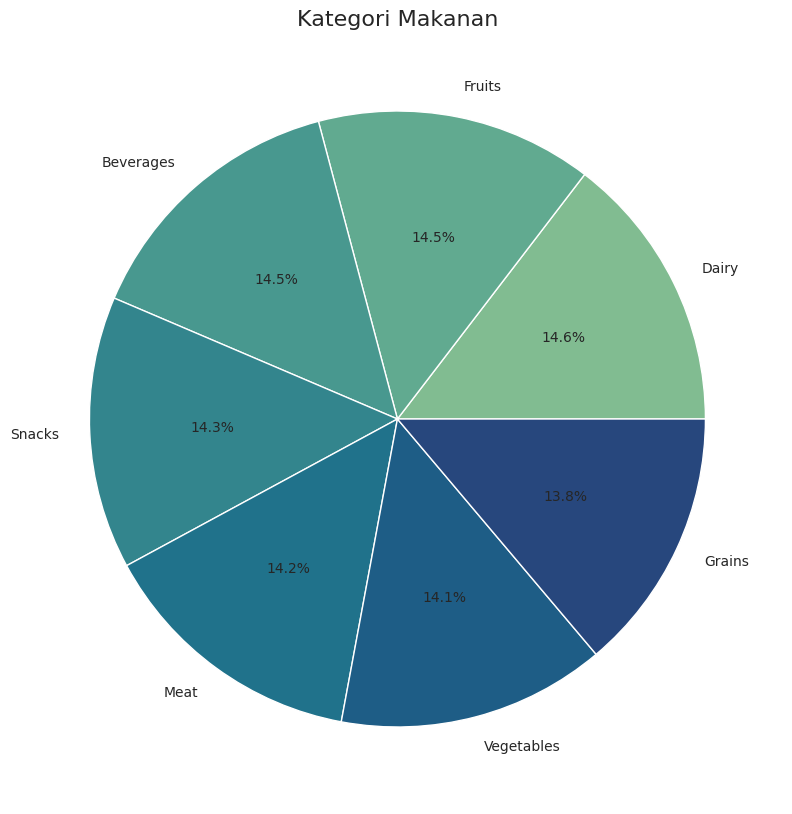

In [ ]:
category_counts = df['Category'].value_counts()

# Hitung persentase setiap kategori
category_percentages = (category_counts / len(df)) * 100

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
colors = sns.color_palette('crest', len(category_percentages))
category_pie_chart = plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Kategori Makanan', fontsize=16)
plt.show()

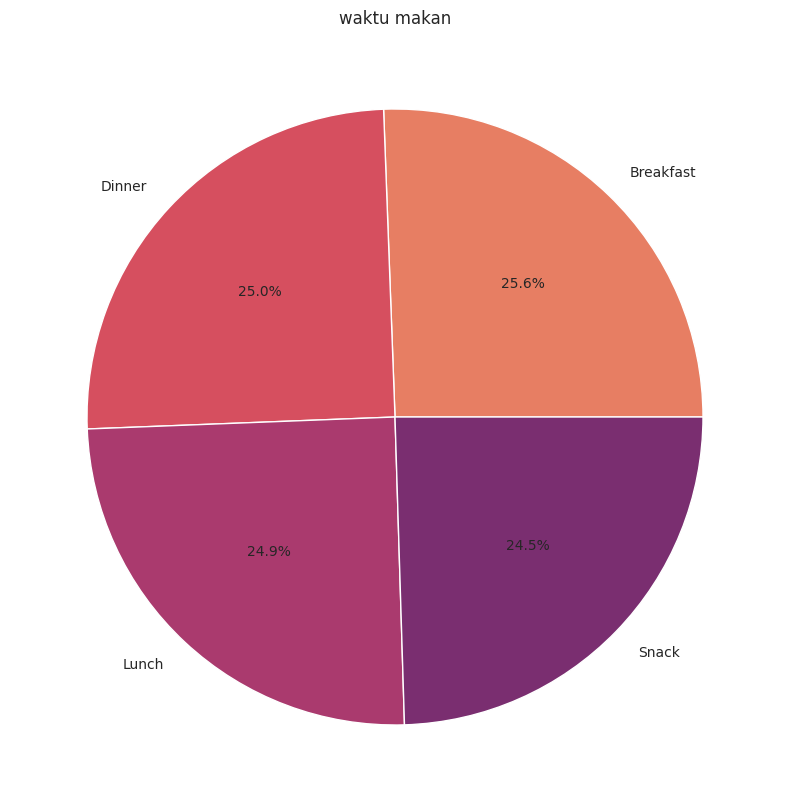

In [ ]:
meal_type_counts = df['Meal_Type'].value_counts()

# Hitung persentase setiap jenis makanan
meal_type_percentages = (meal_type_counts / len(df)) * 100

plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
colors = sns.color_palette('flare', len(meal_type_percentages))
plt.pie(meal_type_percentages, labels=meal_type_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('waktu makan')
plt.show()

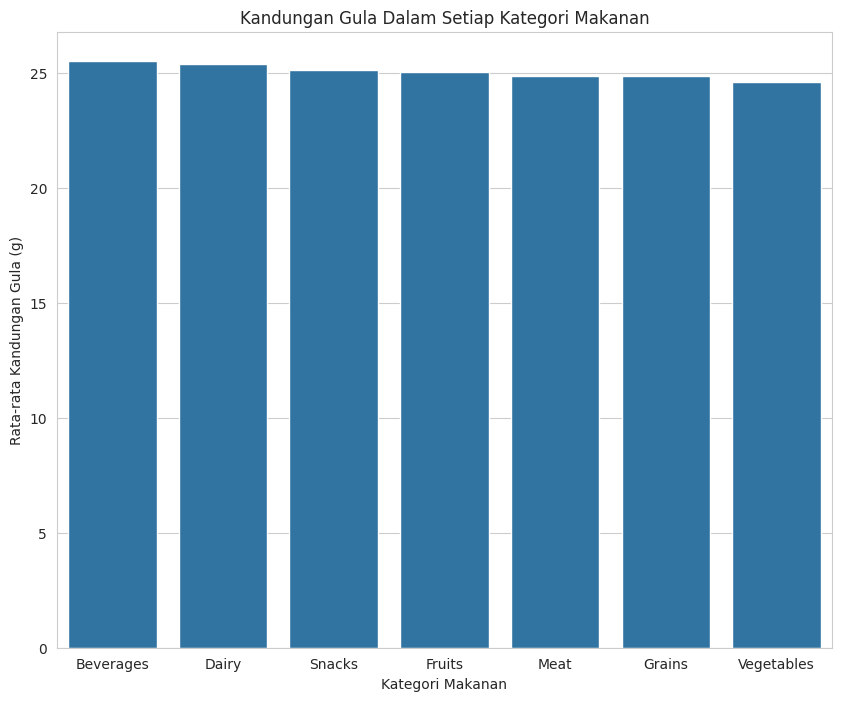

In [ ]:
mean_sugar = df.groupby('Category')['Sugars (g)'].mean()
sorted_average_sugar = mean_sugar.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_average_sugar.index, y=sorted_average_sugar.values)
plt.xlabel('Kategori Makanan')
plt.ylabel('Rata-rata Kandungan Gula (g)')
plt.title('Kandungan Gula Dalam Setiap Kategori Makanan')
plt.show()

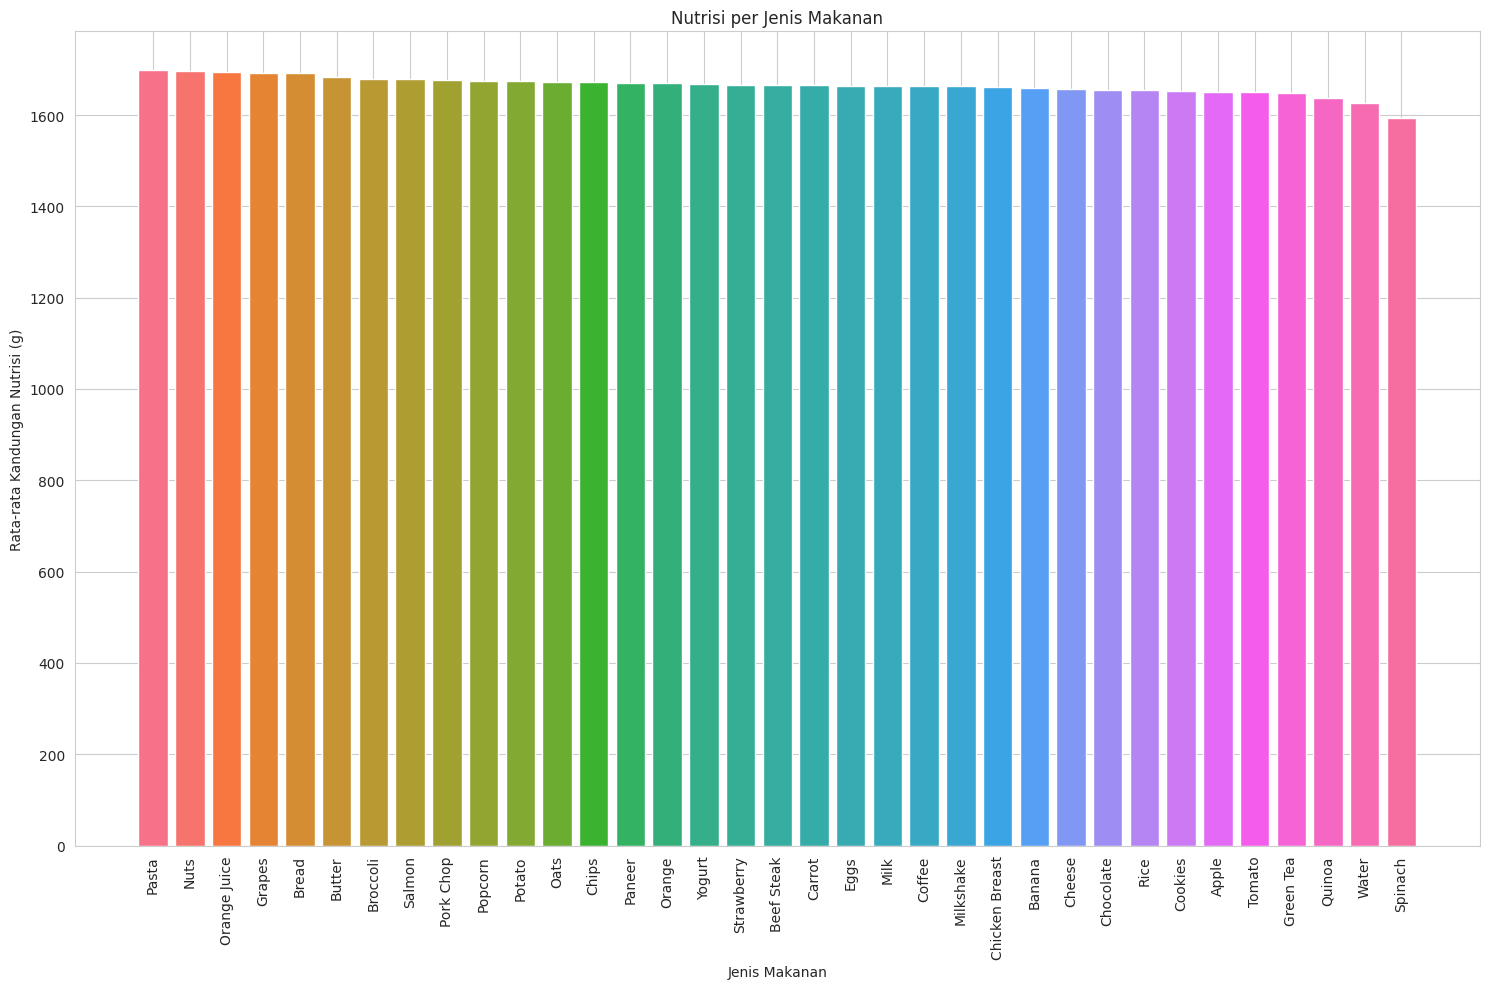

In [ ]:
grouped_df = df.groupby('Food_Item')[['Carbohydrates (g)', 'Fat (g)', 'Protein (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Calories (kcal)', 'Water_Intake (ml)']].mean().reset_index()

# Hitung total nilai nutrisi
grouped_df['Total'] = grouped_df['Carbohydrates (g)'] + grouped_df['Fat (g)'] + grouped_df['Protein (g)'] + grouped_df['Sugars (g)'] + grouped_df['Fiber (g)'] + grouped_df['Cholesterol (mg)'] + grouped_df['Sodium (mg)'] + grouped_df['Calories (kcal)'] + grouped_df['Water_Intake (ml)']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)


plt.figure(figsize=(15, 10))
colors = sns.color_palette('husl', n_colors=len(grouped_df))
plt.bar(grouped_df['Food_Item'], grouped_df['Total'], color=colors)
plt.xlabel('Jenis Makanan')
plt.ylabel('Rata-rata Kandungan Nutrisi (g)')
plt.title('Nutrisi per Jenis Makanan')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

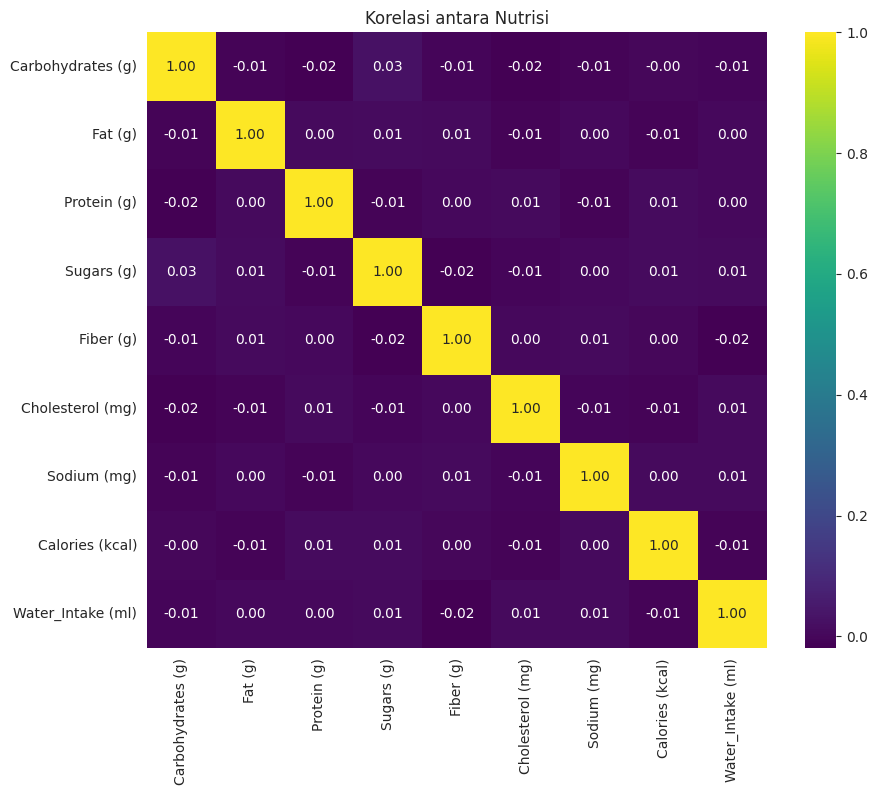

In [ ]:
nutrition_columns = ['Carbohydrates (g)', 'Fat (g)', 'Protein (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Calories (kcal)', 'Water_Intake (ml)']
correlation = df[nutrition_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Korelasi antara Nutrisi')
plt.show()

In [ ]:
numerical_cols = ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)',
                  'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)',
                  'Cholesterol (mg)', 'Water_Intake (ml)']

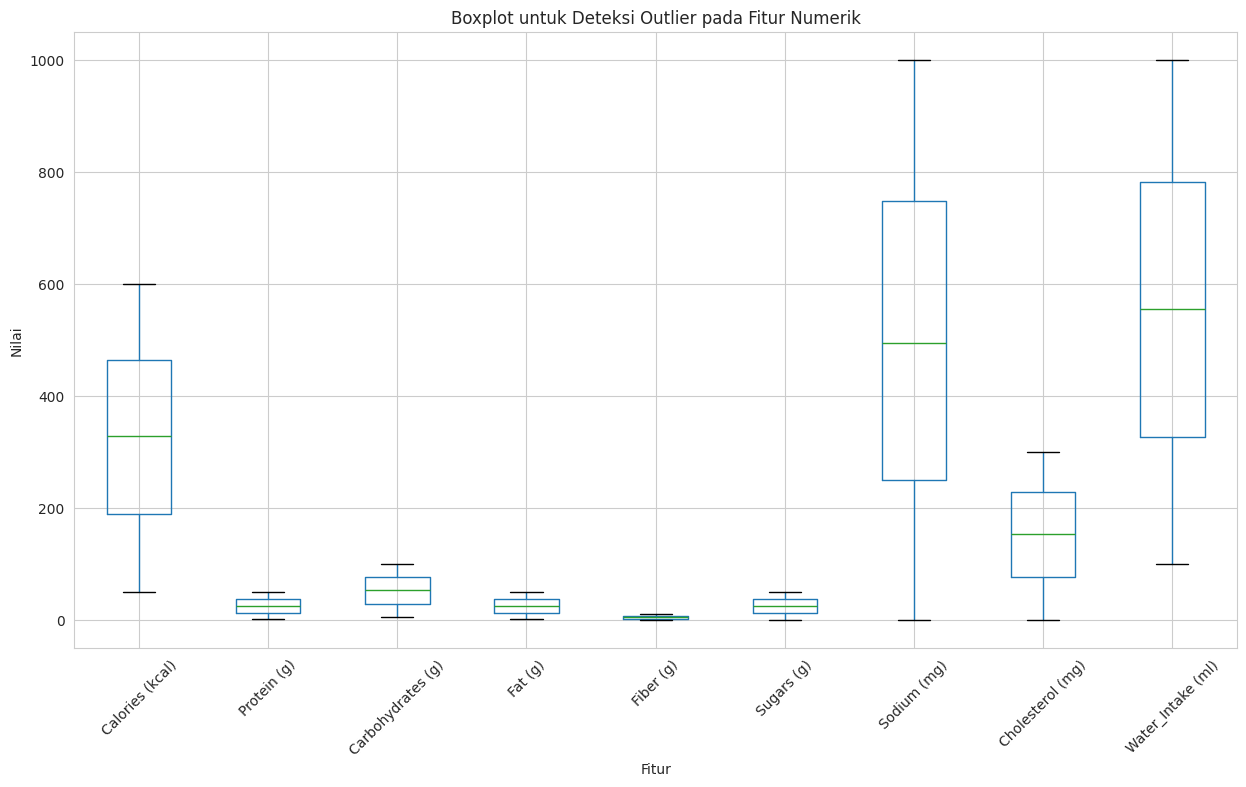

In [ ]:
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.show()

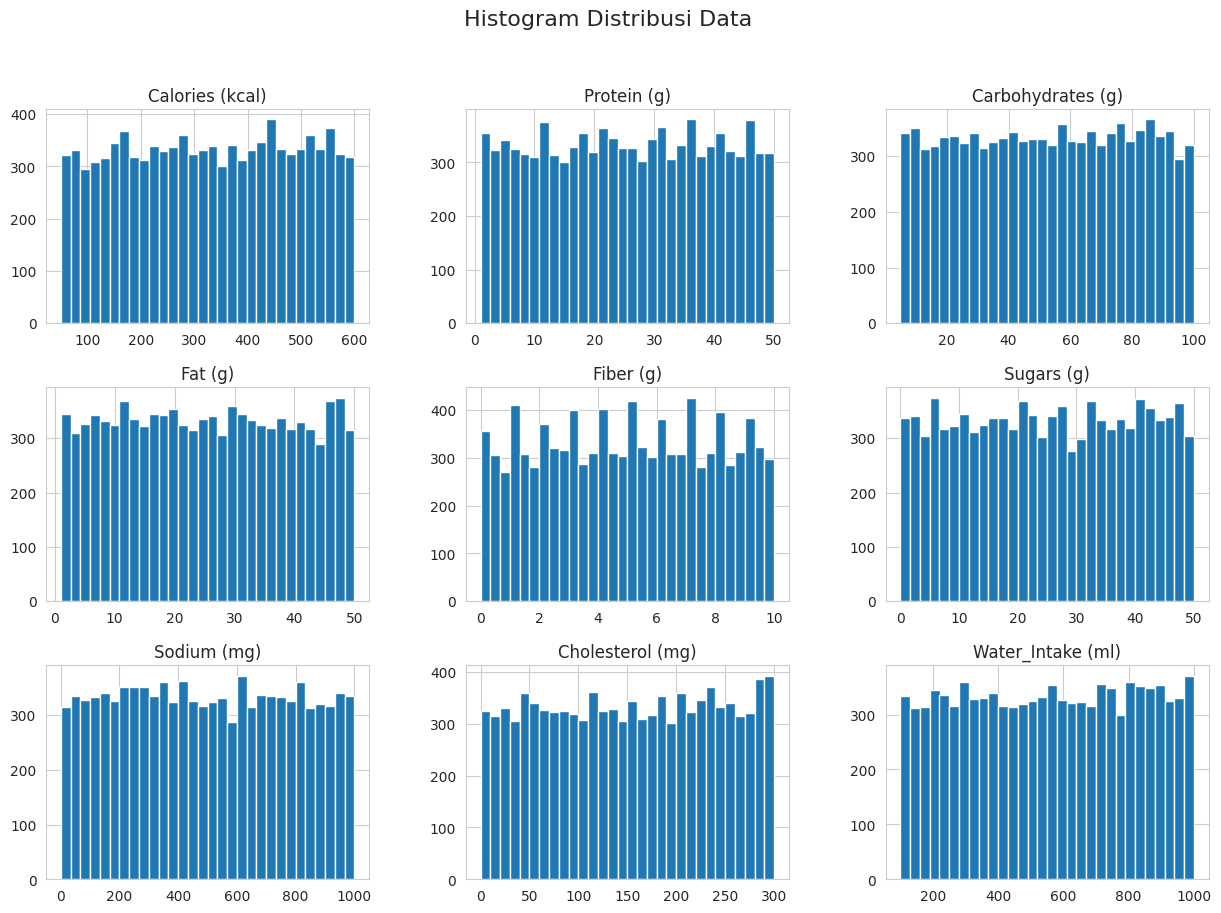

In [ ]:
df[numerical_cols].hist(figsize=(15, 10), bins=30, layout=(3,3))
plt.suptitle("Histogram Distribusi Data", fontsize=16)
plt.show()

In [ ]:
skewness_values = df[numerical_cols].skew()
skewness_values

,0
Calories (kcal),-0.023511
Protein (g),-0.011440
Carbohydrates (g),-0.019422
Fat (g),0.014582
Fiber (g),-0.002138
Sugars (g),-0.009678
Sodium (mg),0.020160
Cholesterol (mg),-0.020035
Water_Intake (ml),-0.018123


In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
Calories (kcal),0
Protein (g),0
Carbohydrates (g),0
Fat (g),0
Fiber (g),0
Sugars (g),0
Sodium (mg),0
Cholesterol (mg),0
Water_Intake (ml),0


### Insight EDA
1. Tidak ada missing value dan data duplicate.
2. Tipe data Dataset:
  - Kategorikal (Date, Food_Item, Category, dan Meal_Type)
  - Numerikal ( Date,User_ID,Calories (kcal), Protein (g), Carbohydrates (g), Fat (g), Fiber (g), Sugars (g), Sodium (mg), Cholesterol (mg), Meal_Type, dan Water_Intake (ml) )
3. Jumlah food item terbanyak adalah milk, orange, dan pork chop.
4. Makanan dengan jumlah nutrisi terbanyak adalah pasta.
5. Waktu makan terbanyak dari dataset adalah breakfast(sarapan).
6. Dataset memiliki jumlah shape 10000 data dan 14 kolom.
7. Dataset tidak memilki outliner setelah di cek dengan IQR dan memiliki skewness normal saat dilihat dari histogram dan fungsi skew.
8. Dataset tidak ada korelasi kuat antar fitur.

# **5. Data Preprocessing**

In [ ]:
df.drop(columns=["Date", "User_ID"], inplace=True)

In [ ]:
categorical_cols = ["Food_Item", "Category", "Meal_Type"]
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

In [ ]:
for col, encoder in label_encoders.items():
    print(f"Mapping LabelEncoder untuk '{col}':")
    label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(label_mapping)
    print("\n")

Mapping LabelEncoder untuk 'Food_Item':
{'Apple': np.int64(0), 'Banana': np.int64(1), 'Beef Steak': np.int64(2), 'Bread': np.int64(3), 'Broccoli': np.int64(4), 'Butter': np.int64(5), 'Carrot': np.int64(6), 'Cheese': np.int64(7), 'Chicken Breast': np.int64(8), 'Chips': np.int64(9), 'Chocolate': np.int64(10), 'Coffee': np.int64(11), 'Cookies': np.int64(12), 'Eggs': np.int64(13), 'Grapes': np.int64(14), 'Green Tea': np.int64(15), 'Milk': np.int64(16), 'Milkshake': np.int64(17), 'Nuts': np.int64(18), 'Oats': np.int64(19), 'Orange': np.int64(20), 'Orange Juice': np.int64(21), 'Paneer': np.int64(22), 'Pasta': np.int64(23), 'Popcorn': np.int64(24), 'Pork Chop': np.int64(25), 'Potato': np.int64(26), 'Quinoa': np.int64(27), 'Rice': np.int64(28), 'Salmon': np.int64(29), 'Spinach': np.int64(30), 'Strawberry': np.int64(31), 'Tomato': np.int64(32), 'Water': np.int64(33), 'Yogurt': np.int64(34)}


Mapping LabelEncoder untuk 'Category':
{'Beverages': np.int64(0), 'Dairy': np.int64(1), 'Fruits': np.in

In [ ]:
df.head()

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,13,4,173,42.4,83.7,1.5,1.5,12.7,752,125,2,478
1,0,2,66,39.2,13.8,3.2,2.6,12.2,680,97,2,466
2,8,4,226,27.1,79.1,25.8,3.2,44.7,295,157,0,635
3,1,2,116,43.4,47.1,16.1,6.5,44.1,307,13,3,379
4,1,2,500,33.9,75.8,47.0,7.8,19.4,358,148,2,471


In [ ]:
numerical= ['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)',
                  'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)',
                  'Cholesterol (mg)', 'Water_Intake (ml)']

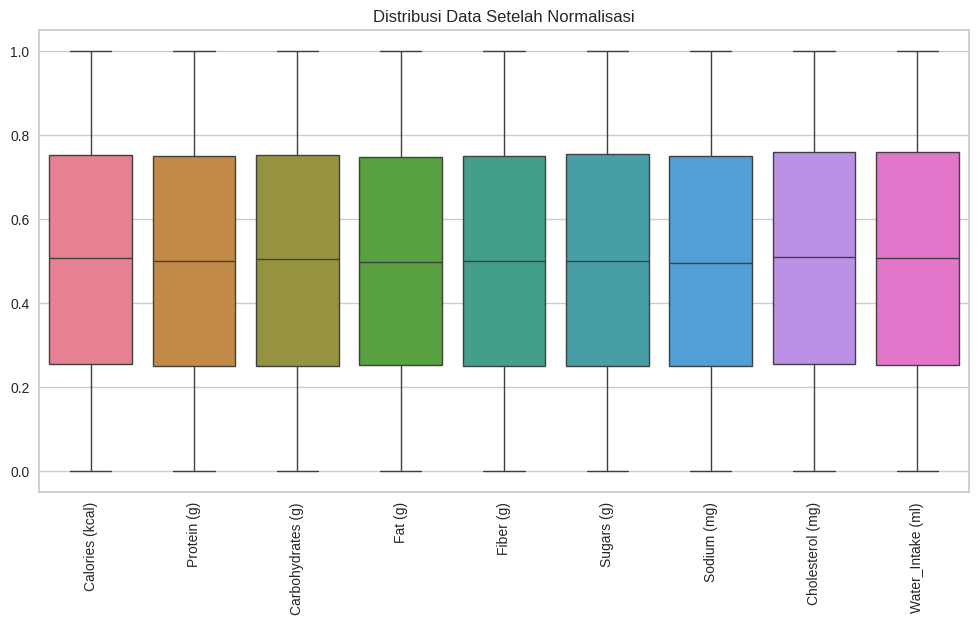

In [ ]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical])
plt.xticks(rotation=90)
plt.title("Distribusi Data Setelah Normalisasi")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          10000 non-null  int64  
 1   Category           10000 non-null  int64  
 2   Calories (kcal)    10000 non-null  float64
 3   Protein (g)        10000 non-null  float64
 4   Carbohydrates (g)  10000 non-null  float64
 5   Fat (g)            10000 non-null  float64
 6   Fiber (g)          10000 non-null  float64
 7   Sugars (g)         10000 non-null  float64
 8   Sodium (mg)        10000 non-null  float64
 9   Cholesterol (mg)   10000 non-null  float64
 10  Meal_Type          10000 non-null  int64  
 11  Water_Intake (ml)  10000 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 937.6 KB


### Insight Data Preprocessing
1. Melakukan drop pada kolom date dan user id karena tidak diperlukan.
2. Menggunakan label encoder untuk mengubah kolom kategorikal yang ada di dataset.
3. Menormalisasi data numerik agar skala nya sama dan dapat digunakan untuk membuat model dengan optimal.
4. Skewness normal.

# **6. Pembangunan Model Clustering**

## Evaluasi Model Clustering

In [ ]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

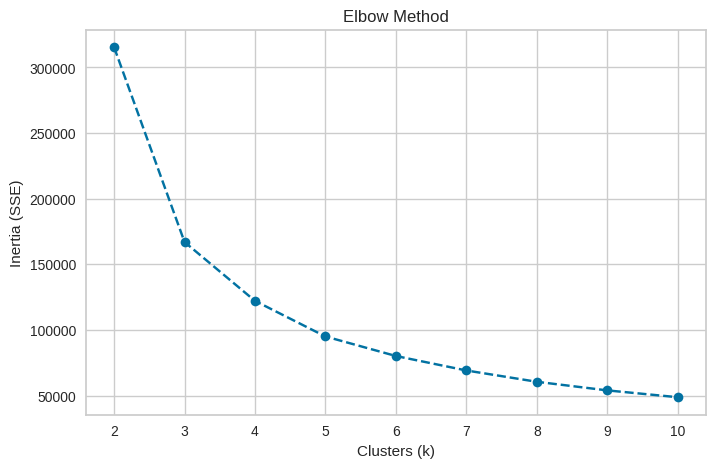

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel("Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()

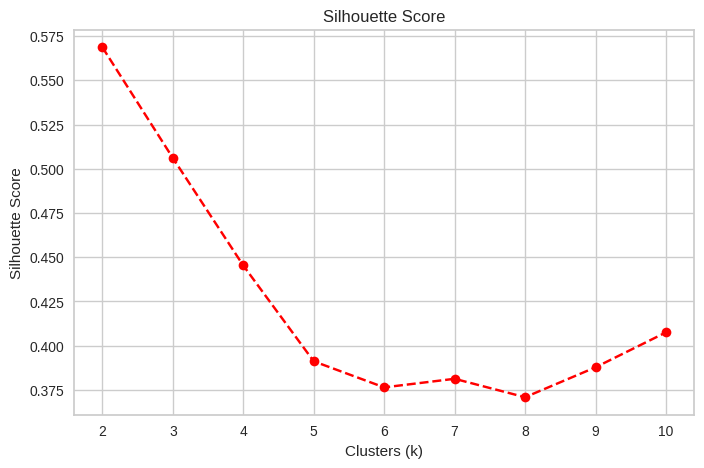

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

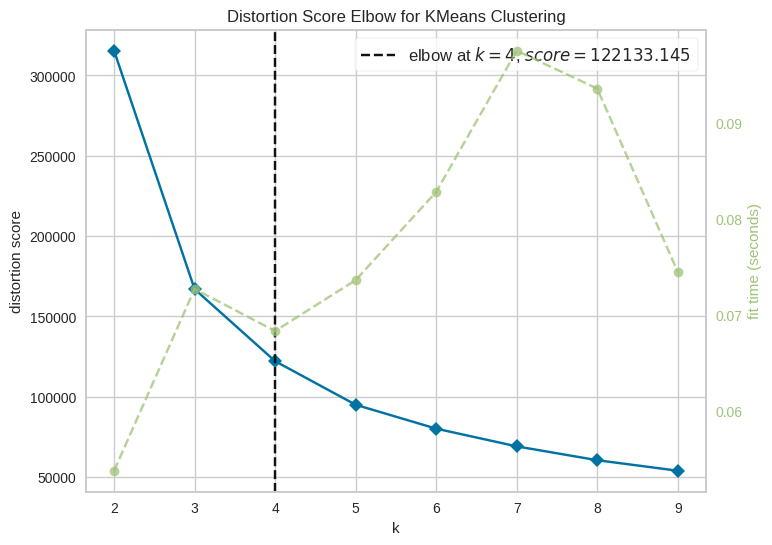

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
kmeans_visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42, n_init=10), k=(2, 10), ax=ax)
kmeans_visualizer.fit(df)
kmeans_visualizer.show()

### Insight
1. Dari titik siku (Elbow) terjadi sekitar k = 4, yang menunjukkan jumlah cluster optimal.
2. Dari Silhouette Score, skor tertinggi terjadi pada k = 3 dan k = 4.
3. Dari K-ElbowVisualizer juga menunjukkan elbow point pada k = 4.


## Clustering Full dataset

In [ ]:
k_4 = 4
kmeans = KMeans(n_clusters=k_4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

In [ ]:
score = silhouette_score(df, df["Cluster"])
print(f"Silhouette Score untuk Model K-Means All Dataset (k4): {score:.4f}")

Silhouette Score untuk Model K-Means All Dataset (k4): 0.4666


## Visualisasi Hasil Clustering Full Dataset

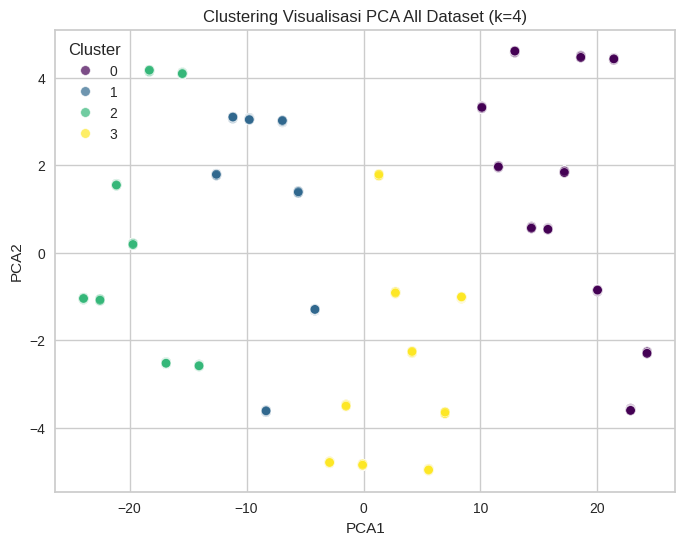

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("Clustering Visualisasi PCA All Dataset (k=4)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

### Insight Clustering Sebelum Feature Selection
- Model menggunakan algoritma KMeans dan menghasilkan akurasi yang masih sangat kecil yaitu 0.4666 yang dikelompokkan dengan 4 kluster.
- Dari visualisasi hasil clustering ini adalah bahwa 4 cluster terbentuk dengan pemisahan yang cukup jelas dalam ruang PCA 2D, menunjukkan adanya perbedaan signifikan dalam karakteristik data antar kelompok.

## Feature Selection Mutual Info Dan Reduksi PCA

In [ ]:
X = df.drop(columns=['Cluster']).copy()
mutual_info = mutual_info_classif(X, np.zeros(X.shape[0]), random_state=42)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mutual_info})
feature_importance = feature_importance.sort_values(by='Mutual_Info', ascending=False)

selected_features = feature_importance['Feature'][:5].tolist()
X_selected = X[selected_features]

In [ ]:
print("Top 5 fitur terpilih berdasarkan Mutual Information:", top_features)

Top 5 fitur terpilih berdasarkan Mutual Information: ['Meal_Type', 'Category', 'Food_Item', 'Calories (kcal)', 'Protein (g)']


In [ ]:
pca = PCA()
pca.fit(X_selected)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.60) + 1

pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_selected)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_pca)
labels = kmeans.labels_

In [ ]:
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score untuk KMeans Mutual Info (k=6): {score:.4f}")

Silhouette Score untuk KMeans Mutual Info (k=6): 0.7385


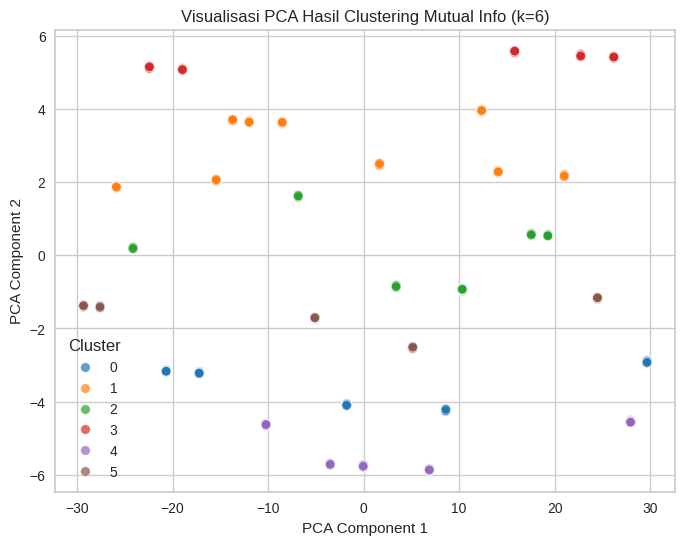

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", alpha=0.7)
plt.title("Visualisasi PCA Hasil Clustering Mutual Info (k=6)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

### Insight Clustering setelah Feature Selection Dengan Mutual info dan PCA
- Silhouette Score bertambah dengan menggunakan Mutual Info dan menjalankan PCA daripada sebelum feature Selection yaitu menjadi 0.7385 yang artinya feature selection berhasil.
- Kluster yang terbentuk adalah 6 kluster.

## **Analisis dan Interpretasi Hasil Cluster**

In [ ]:
df_hasil = df.copy()
df_hasil["Cluster_MI_PCA"] = labels
df_hasil = df_hasil.drop(columns=["Cluster", "Cluster2", "PCA1", "PCA2"], errors='ignore')

In [ ]:
df_hasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Food_Item          10000 non-null  int64  
 1   Category           10000 non-null  int64  
 2   Calories (kcal)    10000 non-null  float64
 3   Protein (g)        10000 non-null  float64
 4   Carbohydrates (g)  10000 non-null  float64
 5   Fat (g)            10000 non-null  float64
 6   Fiber (g)          10000 non-null  float64
 7   Sugars (g)         10000 non-null  float64
 8   Sodium (mg)        10000 non-null  float64
 9   Cholesterol (mg)   10000 non-null  float64
 10  Meal_Type          10000 non-null  int64  
 11  Water_Intake (ml)  10000 non-null  float64
 12  Cluster_MI_PCA     10000 non-null  int32  
dtypes: float64(9), int32(1), int64(3)
memory usage: 976.7 KB


In [ ]:
df_hasil.head()

,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Cluster_MI_PCA
0,13,4,0.223636,0.844898,0.828421,0.010204,0.15,0.254,0.752,0.416667,2,0.420000,2
1,0,2,0.029091,0.779592,0.092632,0.044898,0.26,0.244,0.680,0.323333,2,0.406667,5
2,8,4,0.320000,0.532653,0.780000,0.506122,0.32,0.894,0.295,0.523333,0,0.594444,1
3,1,2,0.120000,0.865306,0.443158,0.308163,0.65,0.882,0.307,0.043333,3,0.310000,5
4,1,2,0.818182,0.671429,0.745263,0.938776,0.78,0.388,0.358,0.493333,2,0.412222,5


In [ ]:
df_hasil[numerical] = scaler.inverse_transform(df_hasil[numerical])

In [ ]:
for col, encoder in label_encoders.items():
    df_hasil[col] = encoder.inverse_transform(df_hasil[col].astype(int))

In [ ]:
print(df_hasil.head())

        Food_Item Category  Calories (kcal)  Protein (g)  Carbohydrates (g)  \
0            Eggs     Meat            173.0         42.4               83.7   
1           Apple   Fruits             66.0         39.2               13.8   
2  Chicken Breast     Meat            226.0         27.1               79.1   
3          Banana   Fruits            116.0         43.4               47.1   
4          Banana   Fruits            500.0         33.9               75.8   

   Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  Cholesterol (mg)  Meal_Type  \
0      1.5        1.5        12.7        752.0             125.0      Lunch   
1      3.2        2.6        12.2        680.0              97.0      Lunch   
2     25.8        3.2        44.7        295.0             157.0  Breakfast   
3     16.1        6.5        44.1        307.0              13.0      Snack   
4     47.0        7.8        19.4        358.0             148.0      Lunch   

   Water_Intake (ml)  Cluster_MI_PCA  
0          

# Hasil Clustering

In [ ]:
agg_funcs = {}

for col in numerical:
    agg_funcs[col] = ['min', 'max', 'mean']

for col in categorical_cols:
    agg_funcs[col] = lambda x: x.mode().iloc[0]

cluster_summary = df_hasil.groupby('Cluster_MI_PCA').agg(agg_funcs)
cluster_summary.columns = ['_'.join([col[0], col[1]]) if isinstance(col, tuple) else col for col in cluster_summary.columns]
display(cluster_summary)

,Calories (kcal)_min,Calories (kcal)_max,Calories (kcal)_mean,Protein (g)_min,Protein (g)_max,Protein (g)_mean,Carbohydrates (g)_min,Carbohydrates (g)_max,Carbohydrates (g)_mean,Fat (g)_min,...,Sodium (mg)_mean,Cholesterol (mg)_min,Cholesterol (mg)_max,Cholesterol (mg)_mean,Water_Intake (ml)_min,Water_Intake (ml)_max,Water_Intake (ml)_mean,Food_Item_<lambda>,Category_<lambda>,Meal_Type_<lambda>
Cluster_MI_PCA,,,,,,,,,,,,,,,,,,,,,
0,50.0,600.0,320.671918,1.0,50.0,25.144726,5.0,99.9,51.500205,1.0,...,505.434932,0.0,300.0,151.412329,100.0,1000.0,558.651370,Milk,Dairy,Breakfast
1,50.0,600.0,330.069740,1.0,50.0,25.867842,5.0,100.0,52.937660,1.0,...,497.896552,0.0,300.0,152.481209,100.0,1000.0,555.813638,Pork Chop,Snacks,Breakfast
2,50.0,600.0,330.189353,1.0,49.9,25.310768,5.1,99.9,52.027526,1.0,...,494.379915,0.0,300.0,153.523291,100.0,999.0,558.108893,Quinoa,Grains,Breakfast
3,50.0,599.0,321.518466,1.0,50.0,25.633097,5.1,100.0,52.750071,1.1,...,499.955256,0.0,300.0,150.053267,100.0,999.0,547.238636,Carrot,Vegetables,Lunch
4,50.0,600.0,332.231142,1.1,50.0,25.570381,5.0,100.0,53.686574,1.0,...,493.152941,0.0,300.0,149.925952,100.0,999.0,549.697578,Orange Juice,Beverages,Dinner
5,50.0,600.0,329.162423,1.0,50.0,25.378527,5.1,99.9,52.314109,1.0,...,497.543703,0.0,300.0,153.171370,101.0,999.0,554.694425,Orange,Fruits,Dinner


Hasil Interpretasi:
1. Cluster 0: Dairy & Sarapan Sehat

2. Cluster 1: Protein Tinggi & Snack Berat

3. Cluster 2: Konsumen Grains untuk Sarapan

4. Cluster 3: Vegetables & Lunch Ringan

5. Cluster 4: Minuman Manis & Dinner

6. Cluster 5: Buah & Dinner Sehat

# Analisis Karakteristik Cluster dari Model

**Cluster 0: Dairy & Sarapan Seimbang**

* Food Item: Milk
* Category: Dairy
* Meal Type: Breakfast
* Calories (kcal): Rata-rata 320.67 kcal, min 50.0 - max 600.0
* Protein (g): Rata-rata 25.14 g, min 1.0 - max 50.0
* Carbohydrates (g): Rata-rata 51.50 g, min 5.0 - max 99.9
* Sodium (mg): Rata-rata 505.43 mg
* Cholesterol (mg): Rata-rata 151.41 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 558.65 ml, min 100.0 - max 1000.0

**Analisis:**

Sarapan berbasis dairy seperti susu, dengan nutrisi yang cukup seimbang, cocok untuk gaya hidup moderat dengan pilihan sarapan bergizi.

---

**Cluster 1: Protein Tinggi & Snack Pagi**

* Food Item: Pork Chop
* Category: Snacks
* Meal Type: Breakfast
* Calories (kcal): Rata-rata 330.07 kcal, min 50.0 - max 600.0
* Protein (g): Rata-rata 25.86 g, min 1.0 - max 50.0
* Carbohydrates (g): Rata-rata 52.93 g, min 5.0 - max 100.0
* Sodium (mg): Rata-rata 497.89 mg
* Cholesterol (mg): Rata-rata 152.48 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 555.81 ml, min 100.0 - max 1000.0

**Analisis:**

Cluster ini cenderung ke konsumsi snack berat tinggi protein seperti daging, menunjukkan pola makan yang padat energi di pagi hari.

---

**Cluster 2: Grains & Sarapan Sehat**

* Food Item: Quinoa
* Category: Grains
* Meal Type: Breakfast
* Calories (kcal): Rata-rata 330.18 kcal, min 50.0 - max 600.0
* Protein (g): Rata-rata 25.31 g, min 1.0 - max 49.9
* Carbohydrates (g): Rata-rata 52.02 g, min 5.1 - max 99.9
* Sodium (mg): Rata-rata 494.38 mg
* Cholesterol (mg): Rata-rata 153.52 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 558.10 ml, min 100.0 - max 999.0

**Analisis:**

Menunjukkan pola makan berbasis biji-bijian sehat seperti quinoa, cenderung diadopsi oleh individu yang sadar nutrisi di pagi hari.

---

**Cluster 3: Sayuran & Lunch Ringan**

* Food Item: Carrot
* Category: Vegetables
* Meal Type: Lunch
* Calories (kcal): Rata-rata 321.51 kcal, min 50.0 - max 599.0
* Protein (g): Rata-rata 25.63 g, min 1.0 - max 50.0
* Carbohydrates (g): Rata-rata 52.75 g, min 5.1 - max 100.0
* Sodium (mg): Rata-rata 499.95 mg
* Cholesterol (mg): Rata-rata 150.05 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 547.23 ml, min 100.0 - max 999.0

**Analisis:**

Dominasi makanan berbasis sayuran saat makan siang, cocok untuk individu yang memilih makan siang ringan dan sehat.

---

**Cluster 4: Minuman & Dinner**

* Food Item: Orange Juice
* Category: Beverages
* Meal Type: Dinner
* Calories (kcal): Rata-rata 332.23 kcal, min 50.0 - max 600.0
* Protein (g): Rata-rata 25.57 g, min 1.1 - max 50.0
* Carbohydrates (g): Rata-rata 53.68 g, min 5.0 - max 100.0
* Sodium (mg): Rata-rata 493.15 mg
* Cholesterol (mg): Rata-rata 149.92 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 549.69 ml, min 100.0 - max 999.0

**Analisis:**

Cluster ini identik dengan minuman seperti jus saat makan malam, dengan kandungan karbohidrat yang cukup tinggi dari gula alami.

---

**Cluster 5: Buah & Dinner Sehat**

* Food Item: Orange
* Category: Fruits
* Meal Type: Dinner
* Calories (kcal): Rata-rata 329.16 kcal, min 50.0 - max 600.0
* Protein (g): Rata-rata 25.37 g, min 1.0 - max 50.0
* Carbohydrates (g): Rata-rata 52.31 g, min 5.1 - max 99.9
* Sodium (mg): Rata-rata 497.54 mg
* Cholesterol (mg): Rata-rata 153.17 mg, min 0.0 - max 300.0
* Water Intake (ml): Rata-rata 554.69 ml, min 101.0 - max 999.0

**Analisis:**

Pilihan makan malam berbasis buah, menunjukkan preferensi makanan ringan dan sehat di malam hari.

# **7. Mengeksport Data**

Menyimpan data yang telah di praproses dengan kolom yang dipilih dengan mutual info dan hasil label akhir untuk digunakan sebagai data lanjutan untuk klasifikasi.

In [ ]:
df['label_hasil'] = labels

In [ ]:
top_5_features = ['Meal_Type', 'Category', 'Food_Item', 'Calories (kcal)', 'Protein (g)']
final = df[top_5_features + ['label_hasil']]

In [ ]:
final.head()

,Meal_Type,Category,Food_Item,Calories (kcal),Protein (g),label_hasil
0,2,4,13,0.223636,0.844898,2
1,2,2,0,0.029091,0.779592,5
2,0,4,8,0.320000,0.532653,1
3,3,2,1,0.120000,0.865306,5
4,2,2,1,0.818182,0.671429,5


In [ ]:
final.to_csv('final_hasil.csv', index=False)